# Area bajo la curva ROC

Vamos a basarnos en un ejemplo de la documentación de sklearn: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data 
y = iris.target
print(y)
np.unique(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array([0, 1, 2])

In [3]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

<span style='color:peru'>Se tienen 75 registros.</span>

In [4]:
# Notar que train_test_split devuelve np.array. X_train etc dejan de ser dataframes.
# len(y_test) # También se puede obtener asi.
y_test.shape

(75,)

In [5]:
y_test[:5] # 5 primeros targets de los 5 primeros registros o muestras.

array([2, 1, 0, 2, 0])

En la siguiente celda aplicamos un one hot enconding a el target con label_binarize.

In [6]:
y_test = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test.shape[1]
print(y_test[:5])
y_test.shape    # Notar que ahora y tiene una segunda dimension de longitud 3 y con dos valores posibles 0, 1.

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]]


(75, 3)

In [7]:
n_classes

3

Prestar atención en la siguiente celda:

En lugar de utilizar predict, utilizamos predict_proba que nos retorna una probabilidad por cada clase.

In [8]:
# Learn to predict each class
classifier = KNeighborsClassifier(n_neighbors=50)
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)
print(y_score[:5])
print(y_score[:5,2])  # Selecciona la ultima componente de cada target. Probabilidad para cada target de predecir como categoria 3.
y_score.shape

[[0.08 0.4  0.52]
 [0.2  0.4  0.4 ]
 [0.58 0.38 0.04]
 [0.08 0.4  0.52]
 [0.58 0.38 0.04]]
[0.52 0.4  0.04 0.52 0.04]


(75, 3)

Por cada clase, calculamos la curva ROC

In [9]:
# Compute ROC curve and ROC area for each class
fpr = dict()    # tasa de falsos positivos por cada clase
tpr = dict()    # tasa de verdaderos positivos por cada clase
umbral = dict()     # Lo agregue para registrar el umbral. Umbral para decidir entre positivo o negativo. Por cada clase.
roc_auc = dict()    # Registra el área bajo la curva ROC (Receiver Operating Characteristic) (Característica Operativa del Receptor)
for i in range(n_classes):
    fpr[i], tpr[i], umbral[i] = roc_curve(y_test[:, i], y_score[:, i],)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [10]:
fpr

{0: array([0.        , 0.        , 0.11111111, 0.16666667, 0.24074074,
        0.25925926, 0.2962963 , 0.31481481, 1.        ]),
 1: array([0.        , 0.55555556, 1.        ]),
 2: array([0.        , 0.2745098 , 0.29411765, 0.33333333, 0.35294118,
        0.41176471, 0.47058824, 0.58823529, 0.98039216, 1.        ])}

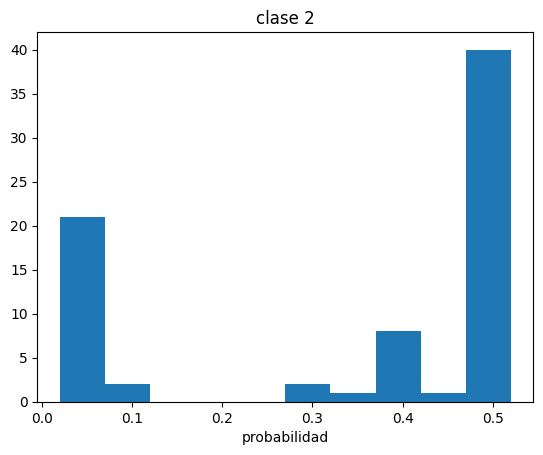

In [11]:
i=2
plt.hist(y_score[:, i])
plt.xlabel("probabilidad")
plt.title(f'clase {i}')
plt.show()

In [12]:
y_score[:, 0] # Probabilidad de que la prediccion del target de como resultado categoria 1 para todos los registros.(75)


array([0.08, 0.2 , 0.58, 0.08, 0.58, 0.08, 0.58, 0.08, 0.08, 0.18, 0.08,
       0.08, 0.08, 0.08, 0.08, 0.58, 0.08, 0.16, 0.58, 0.58, 0.08, 0.1 ,
       0.58, 0.58, 0.08, 0.58, 0.58, 0.08, 0.54, 0.58, 0.08, 0.12, 0.58,
       0.08, 0.08, 0.24, 0.58, 0.08, 0.12, 0.2 , 0.08, 0.58, 0.08, 0.58,
       0.58, 0.48, 0.08, 0.08, 0.08, 0.08, 0.22, 0.08, 0.08, 0.28, 0.08,
       0.08, 0.18, 0.08, 0.08, 0.08, 0.08, 0.58, 0.08, 0.18, 0.3 , 0.2 ,
       0.08, 0.08, 0.58, 0.58, 0.08, 0.18, 0.58, 0.58, 0.08])

In [13]:
# fpr, tpr, _ = roc_curve(y_test[:, 0], y_score[:, 0]) # ya lo hizo mas arriba no hace falta el problema es que lo sobre escribe.
# por eso despues las curvas de más abajo salen mal. Seguramente fue una prueba y se olvidó de sacarla.

In [14]:
umbral[0]

array([ inf, 0.58, 0.22, 0.2 , 0.18, 0.16, 0.12, 0.1 , 0.08])

In [15]:
# fpr 
fpr[0]

array([0.        , 0.        , 0.11111111, 0.16666667, 0.24074074,
       0.25925926, 0.2962963 , 0.31481481, 1.        ])

In [16]:
# tpr
tpr[0]

array([0., 1., 1., 1., 1., 1., 1., 1., 1.])

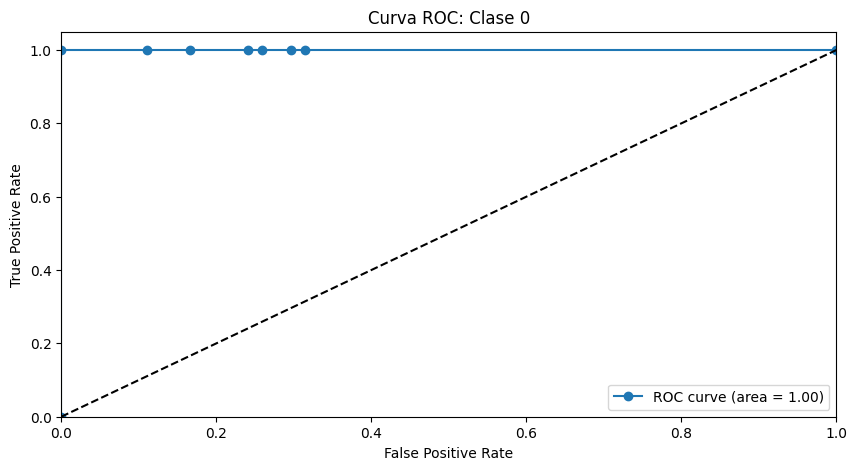

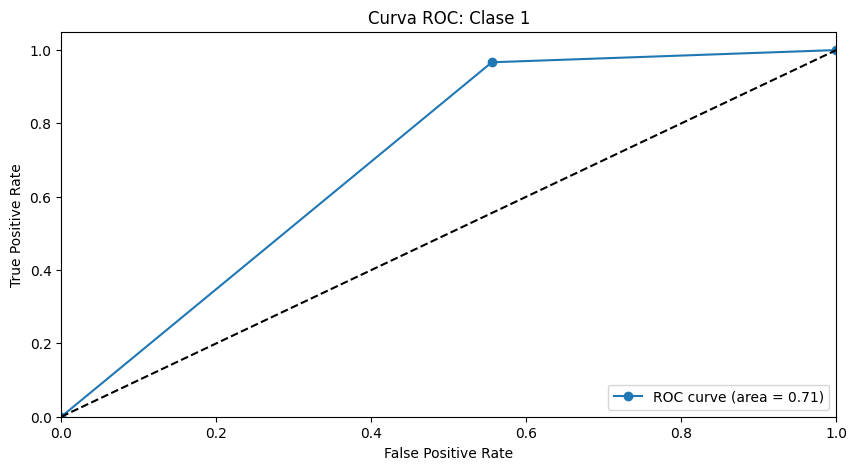

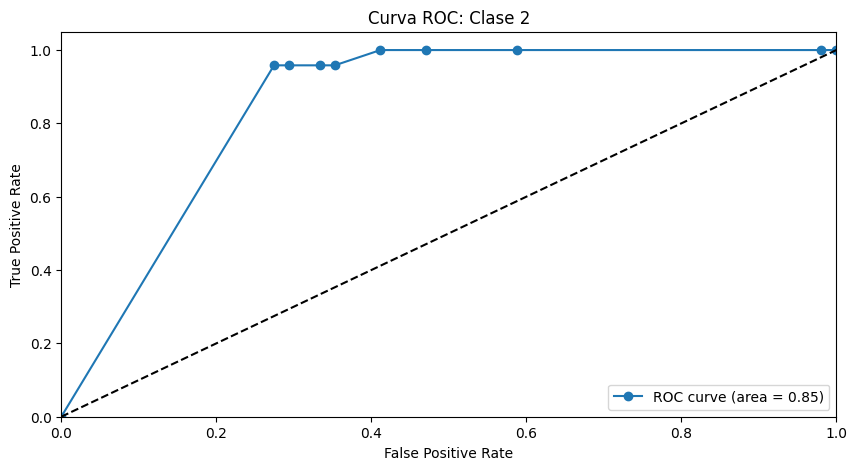

In [17]:
for i in range(n_classes):
    plt.figure(figsize=(10,5))
    plt.plot(fpr[i], tpr[i],'o-', label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC: Clase ' + str(i))
    plt.legend(loc="lower right")
    plt.show()

# Ejercicio

Por grupo buscar un dataset de clasificación binario, entrenar un modelo y graficar la curva ROC.

Algunos datasets pueden ser:
- Titanic
- NBA (clase 19)
- Breast Cancer Wisconsin
- Heart disease https://www.kaggle.com/ronitf/heart-disease-uci

Luego haremos una puesta en comùn entre todos

In [18]:
import pandas as pd

df=pd.read_csv('creditcard.csv')
print(df.head())
print(df.isna().sum())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [19]:
X=df.drop(['Class'],axis=1)
y=df[['Class']]
print(X.columns.tolist())
print(f'Cantidad de Registros: {y.shape[0]}')
print(f'Número de Categorías en "y": {y.Class.nunique()}')
print(f'Catgorías en "y": {y.Class.unique()}')
print(f'Balance {y.Class.value_counts()}')

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Cantidad de Registros: 284807
Número de Categorías en "y": 2
Catgorías en "y": [0 1]
Balance Class
0    284315
1       492
Name: count, dtype: int64


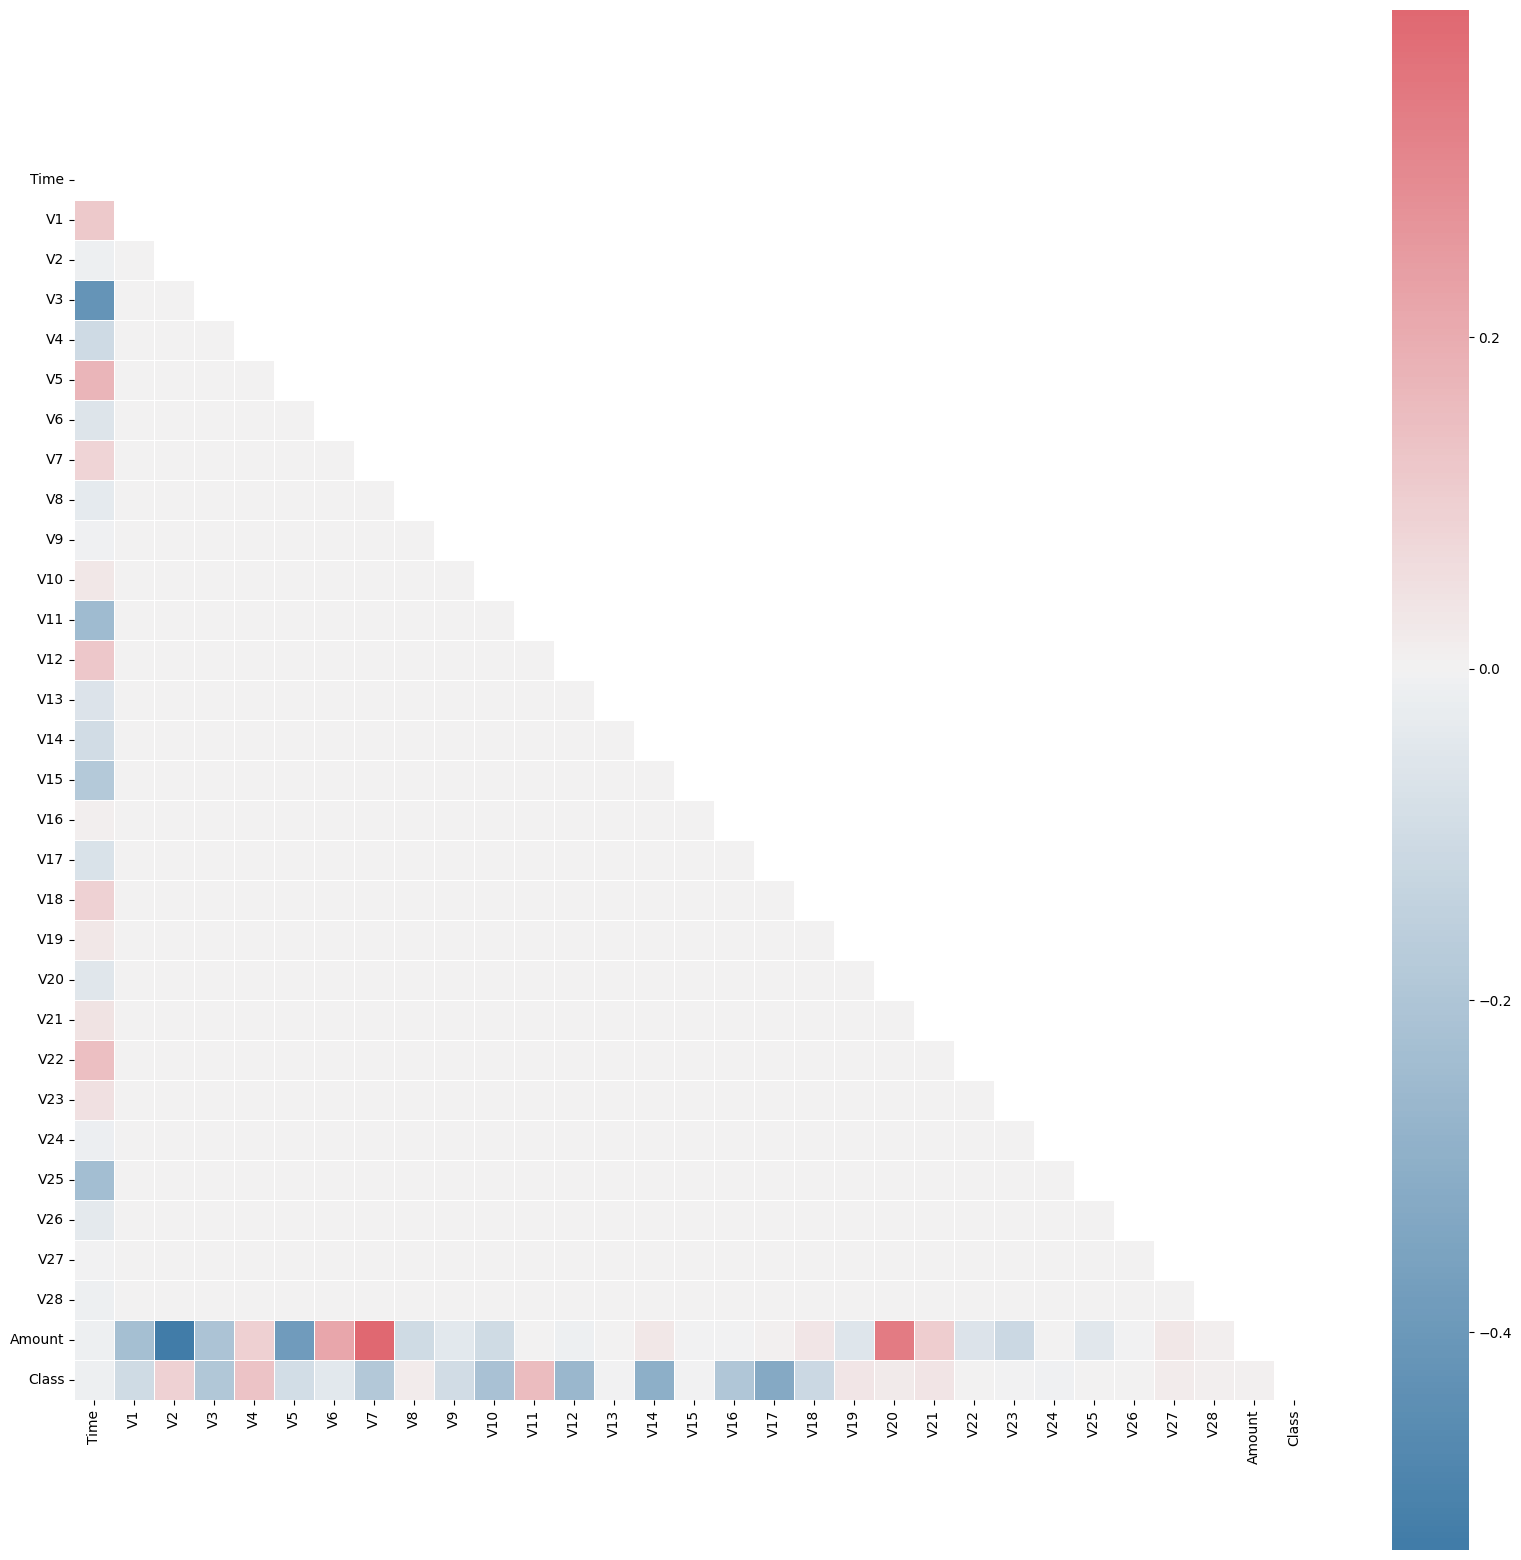

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=False)
plt.show()

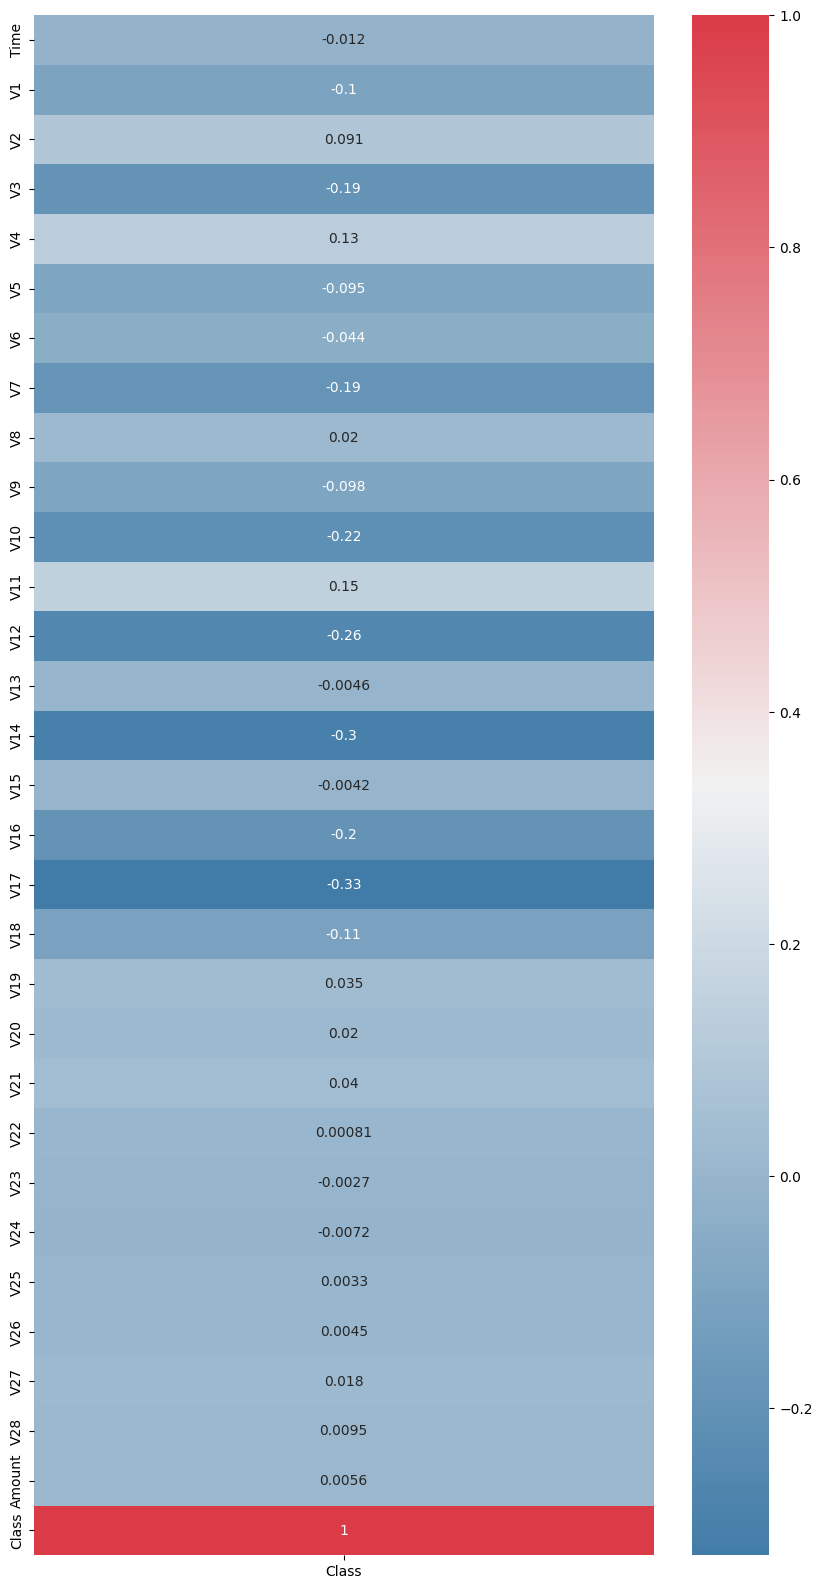

In [21]:
target_corr = pd.DataFrame(df.corr()['Class'], index=df.corr().index)

plt.figure(figsize=(10,20))
sns.heatmap(target_corr, annot=True, cmap=cmap)

plt.show()

Precision:
$$\frac{TP}{(TP+FP)}$$  
  
Recall o Sensibilidad:
$$TPR=\frac{TP}{(TP+FN)}$$

Fall-Out o Falsas Alarmas:  
$$FPR=\frac{FP}{(FP+TN)}$$

f1score:
$$\frac{2 \cdot TP}{2 \cdot TP+FP+FN}$$  
  
    
Accuracy:
$$\frac{TP+TN}{(TP+TN+FP+FN)}$$
  
en donde:  
  
$TP$ son los Verdaderos positivos (prediccion acertada de ocurrencia de la categoría)  
$FP$ son los Falsos positivos (prediccion No acertada de ocurrencia de la categoría)  
$FN$ son los Falsos Negativos (predicción No acertada de "No ocurrencia" de la categoría)  
$TN$ son los Verdaderos Negativos (predicción acertada de "No ocurrencia" de la categoría)  

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10,random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Se definen los modelos y se optimizan para max_depth y n_neighbors.

tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Definir los parámetros a ajustar
param_tree = {
    'max_depth': list(range(1,21)),
}
param_knn = {
    'n_neighbors': list(range(1,50)),
}

# Crear las instancias de GridSearchCV
grid_tree= GridSearchCV(tree, param_grid=param_tree, cv=5, scoring='recall')
grid_knn= GridSearchCV(knn, param_grid=param_knn, cv=5, scoring='recall')

# Realizar la búsqueda de parámetros óptimos
grid_tree.fit(X_train, np.ravel(y_train))
grid_knn.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='recall')

In [24]:
print("Mejores parámetros encontrados:")
print(grid_tree.best_params_)
print(grid_knn.best_params_)

Mejores parámetros encontrados:
{'max_depth': 6}
{'n_neighbors': 1}


In [47]:
from sklearn.metrics import accuracy_score
# Obtener el mejor modelo
tree_m = grid_tree.best_estimator_
knn_m = grid_knn.best_estimator_

# Predicciones
ytreep=tree_m.predict(X_test)
yknnp=knn_m.predict(X_test)
tree_a=accuracy_score(y_test,ytreep)
knn_a=accuracy_score(y_test,yknnp)
print(tree_a,knn_a)

0.9995435553526912 0.9985604438046417


In [25]:
# Predicciones probabilisticas
ytreepp=tree_m.predict_proba(X_test)
yknnpp=knn_m.predict_proba(X_test)

fpr_tree, tpr_tree, umbral_tree = roc_curve(y_test.values.ravel(), ytreepp[:,1],)
roc_auc_tree = auc(fpr_tree, tpr_tree)
fpr_knn, tpr_knn, umbral_knn = roc_curve(y_test.values.ravel(), yknnpp[:,1],)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(10,5))
plt.plot(fpr_tree, tpr_tree,'o-', label='ROC curve (area = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC: Clase Árbol')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(fpr_knn, tpr_knn,'o-', label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC: Clase Árbol')
plt.legend(loc="lower right")
plt.show()

NameError: name 'tree_m' is not defined